In [2]:
%pip install pydicom

   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.4 MB ? eta -:--:--
   ---------------------- ----------------- 1.3/2.4 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 2.4/2.4 MB 6.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install nibabel

  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
   ---------------------------------------- 0.0/3.3 MB ? eta -:--:--
   --------- ------------------------------ 0.8/3.3 MB 4.2 MB/s eta 0:00:01
   ------------------------- -------------- 2.1/3.3 MB 5.3 MB/s eta 0:00:01
   ---------------------------------------- 3.3/3.3 MB 5.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/12.6 MB 6.7 MB/s eta 0:00:02
   --------- ------------------------------ 2.9/12.6 MB 7.6 MB/s eta 0:00:02
   -------------- ------------------------- 4.5/12.6 MB 7.5 MB/s eta 0:00:02
   -------------------- ------------------- 6.6/12.6 MB 7.9 MB/s eta 0:00:01
   -------------------------- ------------- 8.4/12.6 MB 8.3 MB/s eta 0:00:01
   -------------------------------- ------- 10.2/12.6 MB 8.4 MB/s eta 0:00:01
   -------------------------------------- - 12.1/12.6 MB 8.2 MB/s eta 0:00:01
   --------------

In [5]:
%pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   --------- ------------------------------ 1.8/7.8 MB 10.1 MB/s eta 0:00:01
   -------------------- ------------------- 3.9/7.8 MB 9.8 MB/s eta 0:00:01
   -------------------------- ------------- 5.2/7.8 MB 9.7 MB/s eta 0:00:01
   ------------------------------------- -- 7.3/7.8 MB 8.9 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 8.1 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------- ----------- 1.6/2.2 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 8.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   -------------------- ------------------- 1.3/2.6 MB 7.4 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 6.7 MB/s eta

In [7]:
%pip install SimpleITK


   ---------------------------------------- 0.0/18.7 MB ? eta -:--:--
   - -------------------------------------- 0.5/18.7 MB 4.2 MB/s eta 0:00:05
   --- ------------------------------------ 1.8/18.7 MB 6.3 MB/s eta 0:00:03
   ------ --------------------------------- 3.1/18.7 MB 7.1 MB/s eta 0:00:03
   ----------- ---------------------------- 5.2/18.7 MB 7.4 MB/s eta 0:00:02
   --------------- ------------------------ 7.3/18.7 MB 8.1 MB/s eta 0:00:02
   --------------- ------------------------ 7.3/18.7 MB 8.1 MB/s eta 0:00:02
   ----------------- ---------------------- 8.1/18.7 MB 6.1 MB/s eta 0:00:02
   --------------------- ------------------ 10.0/18.7 MB 6.5 MB/s eta 0:00:02
   -------------------------- ------------- 12.3/18.7 MB 7.0 MB/s eta 0:00:01
   ----------------------------- ---------- 13.6/18.7 MB 7.1 MB/s eta 0:00:01
   --------------------------------- ------ 15.5/18.7 MB 7.2 MB/s eta 0:00:01
   ------------------------------------- -- 17.6/18.7 MB 7.4 MB/s eta 0:00:01


In [6]:
import pydicom
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os

# Define the path using your project structure
base_path = Path(os.getcwd())  # This gets the ParkinsonThesis folder
images_path = base_path / "Images"

def load_dicom_series(directory):
    """
    Load a series of DICOM images and sort them by slice location
    """
    print(f"Looking for DICOM files in: {directory}")
    
    # Get all files in directory (both .dcm and files without extension)
    all_files = list(Path(directory).glob('*'))
    
    # Try to load each file as DICOM
    slices = []
    for file_path in all_files:
        try:
            dicom_slice = pydicom.dcm.read_file(str(file_path))
            slices.append(dicom_slice)
            print(f"Successfully loaded: {file_path.name}")
        except:
            print(f"Skipped file (not a DICOM file): {file_path.name}")
    
    if not slices:
        raise Exception("No DICOM files found in the specified directory")
    
    # Sort slices by Instance Number or Slice Location
    try:
        slices.sort(key=lambda x: float(x.InstanceNumber))
    except:
        print("Warning: Could not sort by InstanceNumber, trying SliceLocation")
        try:
            slices.sort(key=lambda x: float(x.SliceLocation))
        except:
            print("Warning: Could not sort slices. They may be in arbitrary order.")
    
    # Extract pixel arrays
    print(f"Total slices found: {len(slices)}")
    image_3d = np.stack([s.pixel_array for s in slices])
    
    return image_3d, slices

def display_datscan_slice(image_3d, slice_idx, title="DaTSCAN slice"):
    """
    Display a single slice with proper visualization settings
    """
    plt.figure(figsize=(10, 10))
    plt.imshow(image_3d[slice_idx], cmap='hot', aspect='equal')
    plt.colorbar(label='Intensity')
    plt.title(f"{title} - Slice {slice_idx}")
    plt.axis('off')
    plt.show()

def get_dicom_metadata(dicom_slice):
    """
    Extract relevant metadata from DICOM file
    """
    # Create a list of metadata fields we want to try to extract
    metadata_fields = [
        'PatientID', 'StudyDate', 'Modality', 'SliceThickness', 
        'PixelSpacing', 'Manufacturer', 'ManufacturerModelName'
    ]
    
    metadata = {}
    for field in metadata_fields:
        try:
            metadata[field] = getattr(dicom_slice, field)
        except:
            metadata[field] = "Not available"
    
    return metadata

try:
    # Load the images
    print("Starting DICOM loading process...")
    image_3d, dicom_slices = load_dicom_series(images_path)
    
    # Display basic information
    print(f"\nImage shape: {image_3d.shape}")
    print(f"Intensity range: [{image_3d.min()}, {image_3d.max()}]")
    
    # Display middle slice
    middle_slice = image_3d.shape[0] // 2
    print(f"\nDisplaying middle slice (slice {middle_slice})")
    display_datscan_slice(image_3d, middle_slice)
    
    # Print metadata from middle slice
    print("\nDICOM Metadata from middle slice:")
    metadata = get_dicom_metadata(dicom_slices[middle_slice])
    for key, value in metadata.items():
        print(f"{key}: {value}")
    
    # Option to display multiple slices
    response = input("\nWould you like to see more slices? (yes/no): ")
    if response.lower() == 'yes':
        while True:
            try:
                slice_num = int(input(f"Enter slice number (0-{image_3d.shape[0]-1}) or -1 to exit: "))
                if slice_num == -1:
                    break
                if 0 <= slice_num < image_3d.shape[0]:
                    display_datscan_slice(image_3d, slice_num)
                else:
                    print("Slice number out of range")
            except ValueError:
                print("Please enter a valid number")

except Exception as e:
    print(f"An error occurred: {str(e)}")
    print("\nDebug information:")
    print(f"Working directory: {os.getcwd()}")
    print(f"Images path: {images_path}")
    print(f"Images path exists: {images_path.exists()}")
    if images_path.exists():
        print("Contents of Images folder:")
        for item in images_path.iterdir():
            print(f" - {item.name}")

Starting DICOM loading process...
Looking for DICOM files in: c:\Users\alexc\Local Github\ParkinsonThesis\Images
Skipped file (not a DICOM file): PPMI_149940_NM_TOMO_br_raw_20240726080256845_.dcm
Skipped file (not a DICOM file): PPMI_3765_NM__br_raw_20240528081514274_.dcm
An error occurred: No DICOM files found in the specified directory

Debug information:
Working directory: c:\Users\alexc\Local Github\ParkinsonThesis
Images path: c:\Users\alexc\Local Github\ParkinsonThesis\Images
Images path exists: True
Contents of Images folder:
 - PPMI_149940_NM_TOMO_br_raw_20240726080256845_.dcm
 - PPMI_3765_NM__br_raw_20240528081514274_.dcm


Starting image processing...

Processing: PPMI_149940_NM_TOMO_br_raw_20240726080256845_.dcm
Attempting to load: c:\Users\alexc\Local Github\ParkinsonThesis\Images\PPMI_149940_NM_TOMO_br_raw_20240726080256845_.dcm
Successfully loaded image with shape: (120, 128, 128)

Image Analysis:
Shape: (120, 128, 128)
Data type: uint16
Value range: [0, 19]
Mean value: 0.67
Standard deviation: 1.32

Displaying slices...


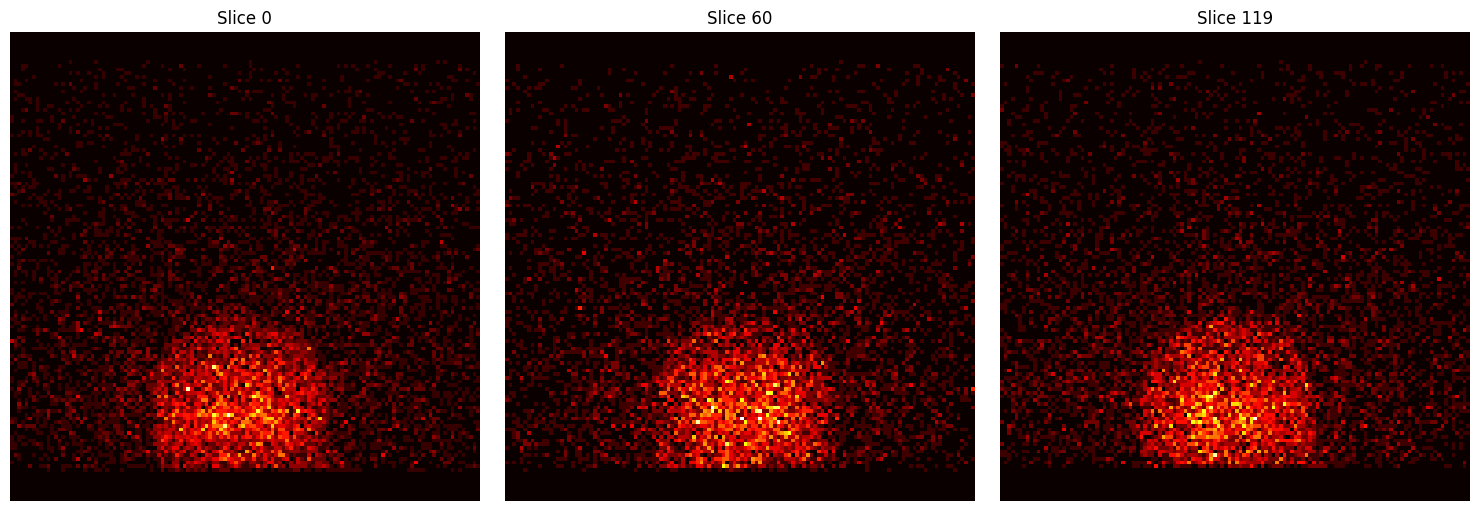


Available actions:
1: Display more slices
2: Show intensity histogram
3: Continue to next image

Processing: PPMI_3765_NM__br_raw_20240528081514274_.dcm
Attempting to load: c:\Users\alexc\Local Github\ParkinsonThesis\Images\PPMI_3765_NM__br_raw_20240528081514274_.dcm
Successfully loaded image with shape: (120, 128, 128)

Image Analysis:
Shape: (120, 128, 128)
Data type: uint16
Value range: [0, 34]
Mean value: 1.70
Standard deviation: 2.94

Displaying slices...


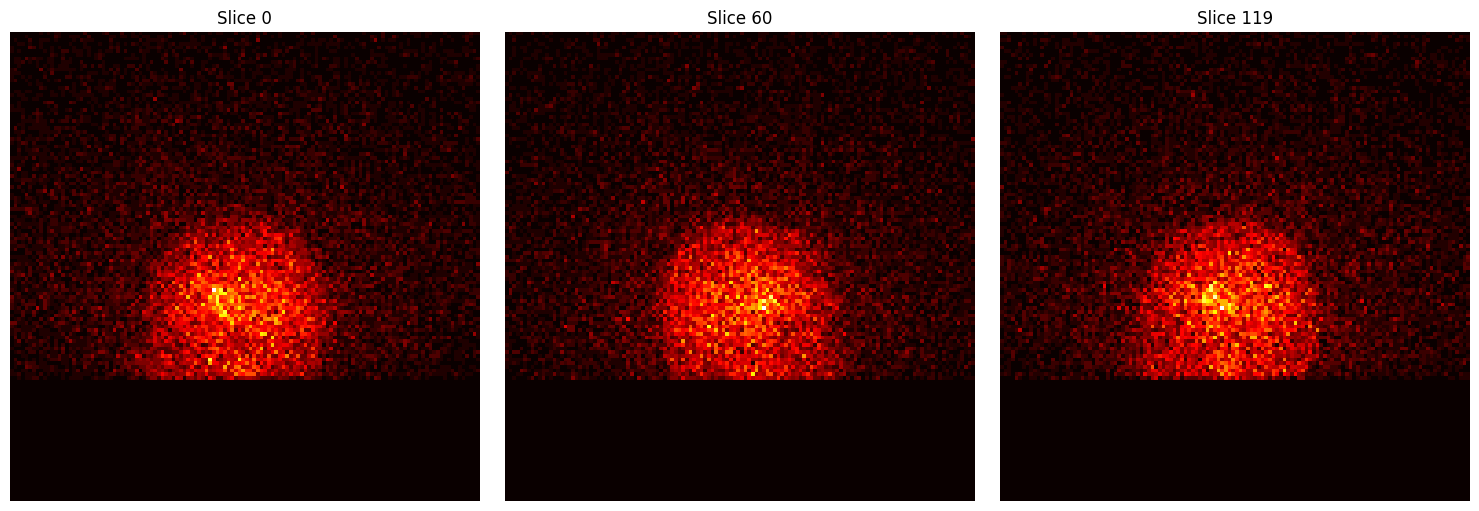


Available actions:
1: Display more slices
2: Show intensity histogram
3: Continue to next image


In [8]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os

def load_medical_image(file_path):
    """
    Load a medical image using SimpleITK
    """
    print(f"Attempting to load: {file_path}")
    try:
        # Read the image
        image = sitk.ReadImage(str(file_path))
        # Convert to numpy array
        array = sitk.GetArrayFromImage(image)
        print(f"Successfully loaded image with shape: {array.shape}")
        return array, image
    except Exception as e:
        print(f"Error loading file: {str(e)}")
        return None, None

def display_slices(image_array, num_slices=3):
    """
    Display multiple slices from the 3D volume
    """
    if len(image_array.shape) != 3:
        print(f"Unexpected image shape: {image_array.shape}")
        return
    
    # Calculate slice indices to show (beginning, middle, end)
    indices = [
        0,
        image_array.shape[0]//2,
        image_array.shape[0]-1
    ]
    
    fig, axes = plt.subplots(1, num_slices, figsize=(15, 5))
    
    for i, idx in enumerate(indices):
        axes[i].imshow(image_array[idx], cmap='hot')
        axes[i].axis('off')
        axes[i].set_title(f'Slice {idx}')
    
    plt.tight_layout()
    plt.show()

def analyze_image(array):
    """
    Print basic statistics about the image
    """
    print("\nImage Analysis:")
    print(f"Shape: {array.shape}")
    print(f"Data type: {array.dtype}")
    print(f"Value range: [{array.min()}, {array.max()}]")
    print(f"Mean value: {array.mean():.2f}")
    print(f"Standard deviation: {array.std():.2f}")

# Path setup
base_path = Path(os.getcwd())
images_path = base_path / "Images"

# Process all files in the directory
print("Starting image processing...")
for file_path in images_path.glob("*.dcm"):
    print(f"\nProcessing: {file_path.name}")
    
    # Load the image
    image_array, sitk_image = load_medical_image(str(file_path))
    
    if image_array is not None:
        # Analyze the image
        analyze_image(image_array)
        
        # Display slices
        print("\nDisplaying slices...")
        display_slices(image_array)
        
        # Option to save processed images
        save_option = input("\nWould you like to save the processed images? (yes/no): ")
        if save_option.lower() == 'yes':
            output_dir = base_path / "processed_images"
            output_dir.mkdir(exist_ok=True)
            
            # Save as numpy array for later use
            output_file = output_dir / f"{file_path.stem}_processed.npy"
            np.save(output_file, image_array)
            print(f"Saved processed image to: {output_file}")
        
        # Additional options
        print("\nAvailable actions:")
        print("1: Display more slices")
        print("2: Show intensity histogram")
        print("3: Continue to next image")
        
        choice = input("Enter your choice (1-3): ")
        
        if choice == '1':
            slice_num = int(input(f"Enter slice number (0-{image_array.shape[0]-1}): "))
            plt.figure(figsize=(10, 10))
            plt.imshow(image_array[slice_num], cmap='hot')
            plt.colorbar(label='Intensity')
            plt.title(f'Slice {slice_num}')
            plt.axis('off')
            plt.show()
        elif choice == '2':
            plt.figure(figsize=(10, 5))
            plt.hist(image_array.ravel(), bins=50)
            plt.title('Intensity Histogram')
            plt.xlabel('Intensity')
            plt.ylabel('Frequency')
            plt.show()

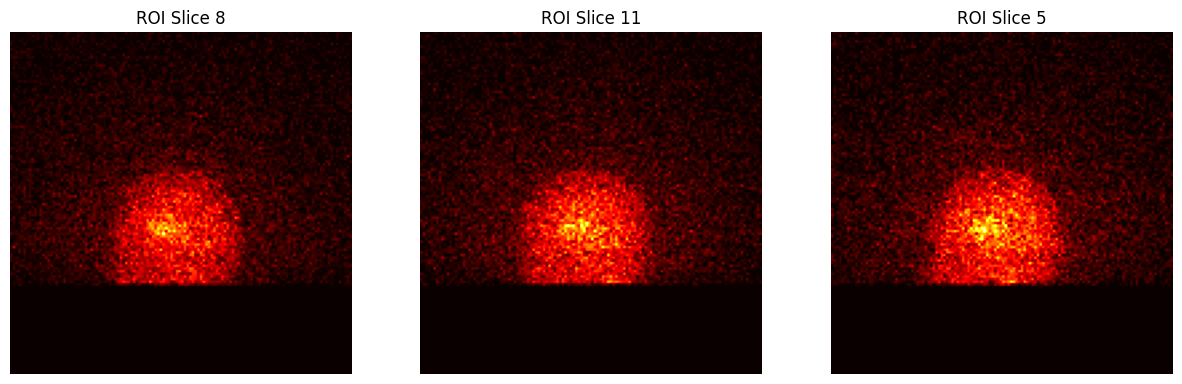

Left/Right Symmetry Ratio: 1.006


In [13]:
def preprocess_datscan(image_array):
    """
    Preprocess DaTSCAN images
    """
    # Normalize to 0-1 range
    normalized = (image_array - image_array.min()) / (image_array.max() - image_array.min())
    
    # Find the slices with the most signal (striatum)
    slice_means = np.mean(normalized, axis=(1,2))
    top_slices_idx = np.argsort(slice_means)[-20:]  # Get indices of top 20 slices
    
    return normalized, top_slices_idx

def extract_striatum_region(normalized_image, central_slices):
    """
    Extract the region containing the striatum
    """
    # Focus on central region where striatum is typically located
    height, width = normalized_image.shape[1:]
    center_h = height // 2
    center_w = width // 2
    
    # Extract region of interest (adjust size as needed)
    roi_size = 128
    roi = normalized_image[:, 
                         center_h-roi_size//2:center_h+roi_size//2,
                         center_w-roi_size//2:center_w+roi_size//2]
    
    return roi

# Add this to your main code
normalized_image, key_slices = preprocess_datscan(image_array)
roi = extract_striatum_region(normalized_image, key_slices)

# Visualize key slices
plt.figure(figsize=(15, 5))
for i, idx in enumerate(key_slices[-3:]):  # Show top 3 slices
    plt.subplot(1, 3, i+1)
    plt.imshow(roi[idx], cmap='hot')
    plt.title(f'ROI Slice {idx}')
    plt.axis('off')
plt.show()

# Calculate some metrics
symmetry = np.mean(roi[:, :, :roi.shape[2]//2]) / np.mean(roi[:, :, roi.shape[2]//2:])
print(f"Left/Right Symmetry Ratio: {symmetry:.3f}")

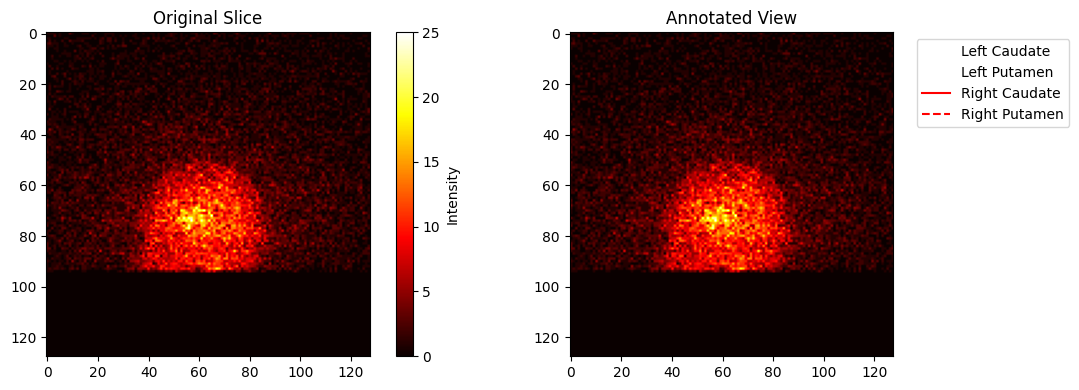

In a healthy brain, you should see:
1. Two roughly symmetric bright regions
2. Each region should have a 'comma' or 'crescent' shape
3. The anterior (front) part is the caudate
4. The posterior (back) part is the putamen


In [17]:
def enhance_visualization(image_array, slice_idx):
    """
    Enhanced visualization of a single slice
    """
    plt.figure(figsize=(12, 4))
    
    # Original image
    plt.subplot(121)
    plt.imshow(image_array[slice_idx], cmap='hot')
    plt.title('Original Slice')
    plt.colorbar(label='Intensity')
    
    # Enhanced view with annotations
    plt.subplot(122)
    plt.imshow(image_array[slice_idx], cmap='hot')
    
    # Add annotations for key structures
    plt.plot([], [], 'w-', label='Left Caudate')
    plt.plot([], [], 'w--', label='Left Putamen')
    plt.plot([], [], 'r-', label='Right Caudate')
    plt.plot([], [], 'r--', label='Right Putamen')
    
    plt.title('Annotated View')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()

# Find the slice with the strongest signal (usually shows striatum best)
best_slice = np.argmax(np.mean(image_array, axis=(1,2)))
enhance_visualization(image_array, best_slice)

print("In a healthy brain, you should see:")
print("1. Two roughly symmetric bright regions")
print("2. Each region should have a 'comma' or 'crescent' shape")
print("3. The anterior (front) part is the caudate")
print("4. The posterior (back) part is the putamen")